<a href="https://colab.research.google.com/github/SaChIn5419/Data-science-workshop-/blob/main/employee_performance_and_retention_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load the dataset
data = pd.read_csv('employee_data.csv')

# Drop irrelevant columns
data_cleaned = data.drop(['EmployeeID', 'Name'], axis=1)

# Encode categorical features
encoder = LabelEncoder()
data_cleaned['Department'] = encoder.fit_transform(data_cleaned['Department'])
data_cleaned['Attrition'] = encoder.fit_transform(data_cleaned['Attrition'])

# Scale numerical features
scaler = MinMaxScaler()
numerical_features = ['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore']
data_cleaned[numerical_features] = scaler.fit_transform(data_cleaned[numerical_features])


              Age  Department      Salary  YearsAtCompany  PerformanceScore  \
count  100.000000  100.000000  100.000000      100.000000        100.000000   
mean     0.330571    1.440000    0.573462        0.408333          0.597600   
std      0.237671    1.157496    0.243150        0.265049          0.253991   
min      0.000000    0.000000    0.000000        0.000000          0.000000   
25%      0.135714    0.000000    0.423077        0.166667          0.400000   
50%      0.285714    1.000000    0.557692        0.375000          0.620000   
75%      0.464286    3.000000    0.764423        0.625000          0.800000   
max      1.000000    3.000000    1.000000        1.000000          1.000000   

        Attrition  
count  100.000000  
mean     0.390000  
std      0.490207  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000  


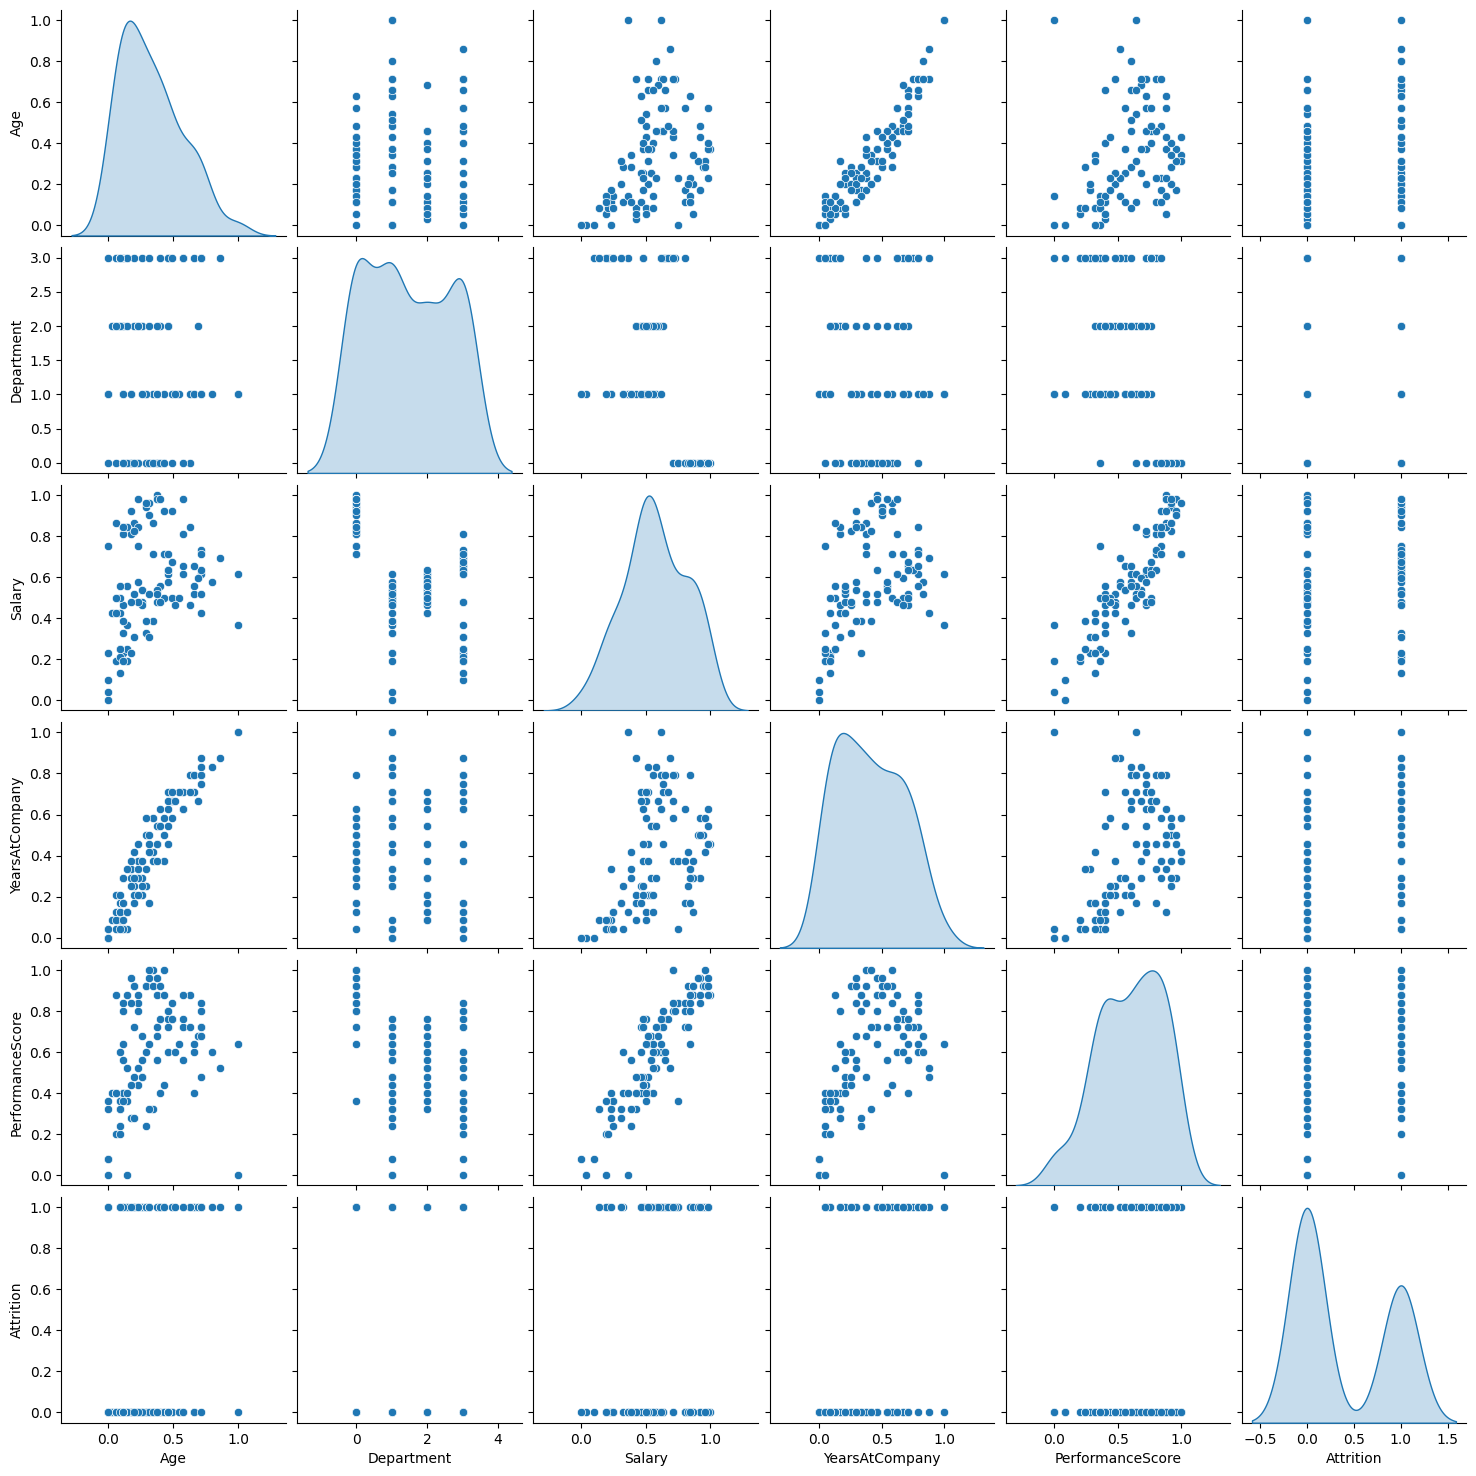

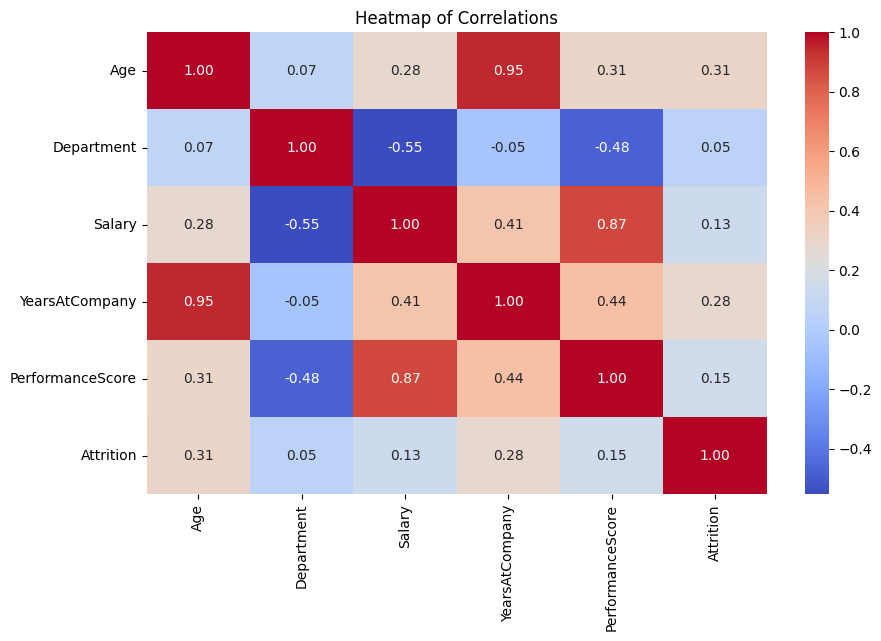

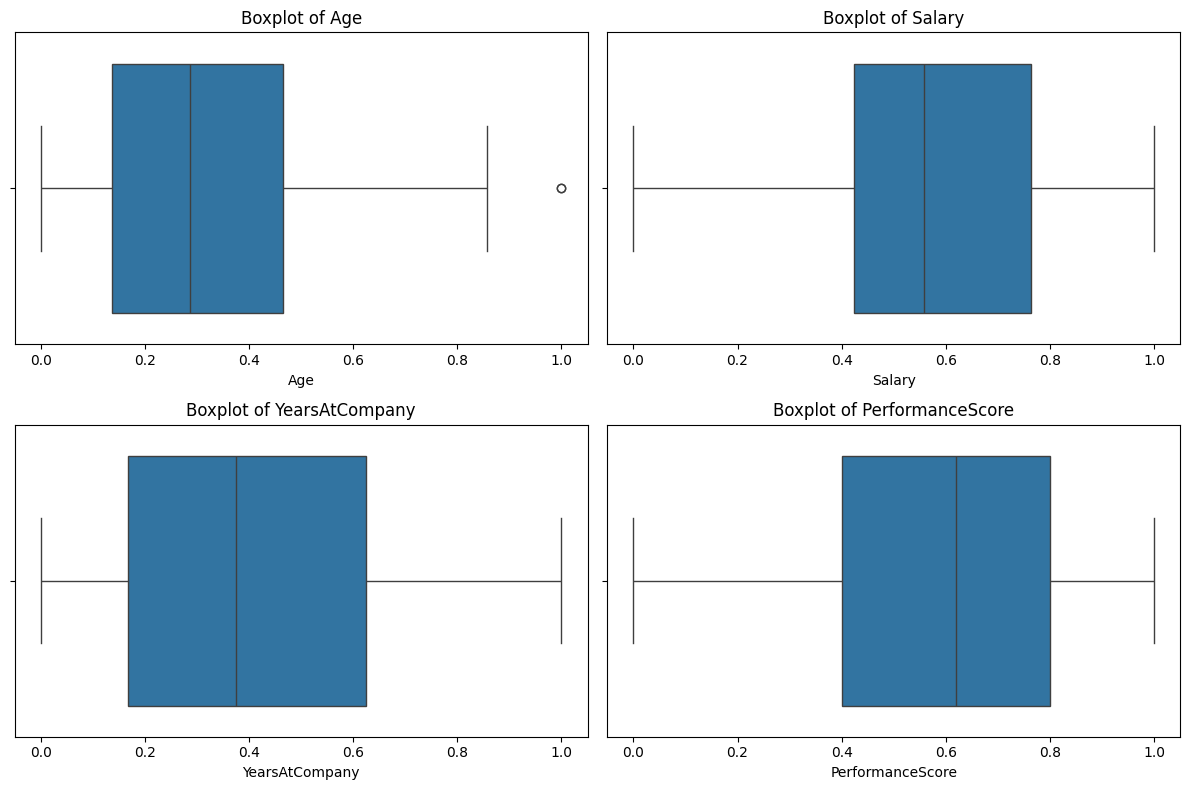

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Descriptive Statistics
print(data_cleaned.describe())

# Pairplot for relationships
sns.pairplot(data_cleaned, diag_kind='kde')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap of Correlations")
plt.show()

# Boxplots for Outliers
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data_cleaned[feature])
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()


In [ ]:
# Calculate Probability of Attrition by Department
attrition_prob = data_cleaned.groupby('Department')['Attrition'].mean()
print("Attrition Probability by Department:\n", attrition_prob)

# Bayes' Theorem (Example for Performance Score > 0.8)
prob_performance = len(data_cleaned[data_cleaned['PerformanceScore'] > 0.8]) / len(data_cleaned)
prob_attrition = len(data_cleaned[data_cleaned['Attrition'] == 1]) / len(data_cleaned)
prob_perf_given_attr = len(data_cleaned[(data_cleaned['PerformanceScore'] > 0.8) & (data_cleaned['Attrition'] == 1)]) / len(data_cleaned[data_cleaned['Attrition'] == 1])

bayes_result = (prob_perf_given_attr * prob_attrition) / prob_performance
print(f"Probability of Attrition given Performance > 0.8: {bayes_result}")

# Hypothesis Testing: Mean Performance Score across Departments
from scipy.stats import f_oneway

department_groups = [data_cleaned[data_cleaned['Department'] == d]['PerformanceScore'] for d in data_cleaned['Department'].unique()]
f_stat, p_value = f_oneway(*department_groups)
print(f"ANOVA F-statistic: {f_stat}, P-value: {p_value}")


Attrition Probability by Department:
 Department
0    0.428571
1    0.346154
2    0.200000
3    0.538462
Name: Attrition, dtype: float64
Probability of Attrition given Performance > 0.8: 0.5000000000000001
ANOVA F-statistic: 25.78106808664636, P-value: 2.5591493445551734e-12


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.57      0.57      0.57         7

    accuracy                           0.70        20
   macro avg       0.67      0.67      0.67        20
weighted avg       0.70      0.70      0.70        20



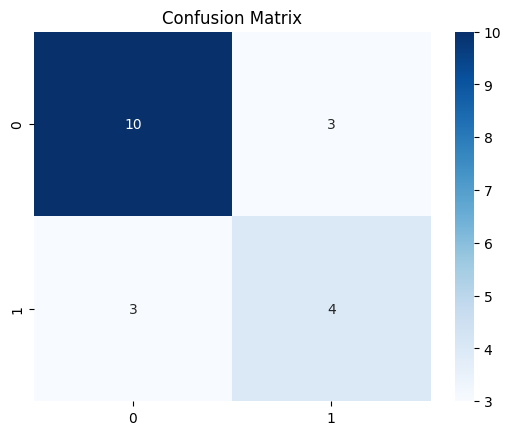

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Prepare data
X = data_cleaned.drop(['Attrition'], axis=1)
y = data_cleaned['Attrition']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


Mean Squared Error: 0.020525092068584033
R-squared: 0.7487625823959064


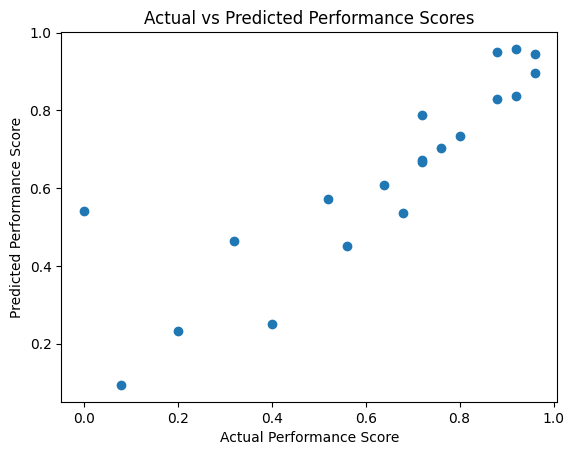

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data
X = data_cleaned.drop(['PerformanceScore'], axis=1)
y = data_cleaned['PerformanceScore']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Evaluate model
y_pred = regressor.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

# Visualize Predictions
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Actual vs Predicted Performance Scores")
plt.show()


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.1327 - mae: 0.2937 - val_loss: 0.1158 - val_mae: 0.2846
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0728 - mae: 0.2121 - val_loss: 0.0915 - val_mae: 0.2306
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0635 - mae: 0.1897 - val_loss: 0.0781 - val_mae: 0.2028
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0554 - mae: 0.1847 - val_loss: 0.0713 - val_mae: 0.2032
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0477 - mae: 0.1697 - val_loss: 0.0650 - val_mae: 0.1960
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0342 - mae: 0.1408 - val_loss: 0.0600 - val_mae: 0.1866
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0324 - mae: 0.1426 - val_loss: 0.0542 - val_mae: 0.1694
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0276 - mae: 0.1283 - val_loss: 0.0509 - val_mae: 0.1596
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0307 - mae: 0.1369 - v

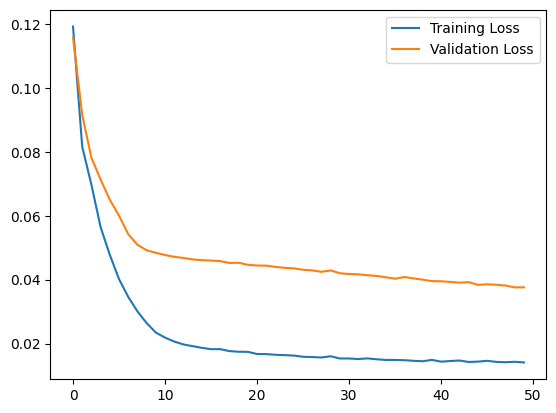

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Prepare data
X = data_cleaned.drop(['PerformanceScore'], axis=1).values
y = data_cleaned['PerformanceScore'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1)  # Regression output
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=8)

# Evaluate
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae}")

# Visualize Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
